## 1. Setting up

Importing key libraries that are fundamental for data analysis and visualization in Python.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_dir = os.getcwd()[:-13] +'data\\'
file_name = 'integrated_data.csv'
os.chdir(data_dir)
#Read the data
data = pd.read_csv(file_name)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489524 entries, 0 to 489523
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        489524 non-null  int64  
 1   track_id          489524 non-null  object 
 2   explicit          489524 non-null  object 
 3   preview_url       484327 non-null  object 
 4   release_date      489524 non-null  object 
 5   popularity        489524 non-null  float64
 6   acousticness      489524 non-null  float64
 7   danceability      489524 non-null  float64
 8   duration_ms       489524 non-null  int64  
 9   energy            489524 non-null  float64
 10  instrumentalness  489524 non-null  float64
 11  key               489524 non-null  int64  
 12  liveness          489524 non-null  float64
 13  loudness          489524 non-null  float64
 14  mode              489524 non-null  int64  
 15  speechiness       489524 non-null  float64
 16  tempo             48

In [ ]:
data[["year", "month", "day"]] = data["release_date"].str.split("-", expand = True) #spliting release_date to year month and day

In [ ]:
columns_to_drop = ["Unnamed: 0", "release_date", "day"] #dropping columns as they are on no use
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489524 entries, 0 to 489523
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          489524 non-null  object 
 1   explicit          489524 non-null  object 
 2   preview_url       484327 non-null  object 
 3   popularity        489524 non-null  float64
 4   acousticness      489524 non-null  float64
 5   danceability      489524 non-null  float64
 6   duration_ms       489524 non-null  int64  
 7   energy            489524 non-null  float64
 8   instrumentalness  489524 non-null  float64
 9   key               489524 non-null  int64  
 10  liveness          489524 non-null  float64
 11  loudness          489524 non-null  float64
 12  mode              489524 non-null  int64  
 13  speechiness       489524 non-null  float64
 14  tempo             489524 non-null  int64  
 15  valence           489524 non-null  float64
 16  artist_name       48

In [ ]:
null_counts = data.isnull().sum()

# To display the count of null values in each column
print(null_counts)

track_id                0
explicit                0
preview_url          5197
popularity              0
acousticness            0
danceability            0
duration_ms             0
energy                  0
instrumentalness        0
key                     0
liveness                0
loudness                0
mode                    0
speechiness             0
tempo                   0
valence                 0
artist_name             0
year                    0
month               11337
dtype: int64


In [ ]:
data.dropna(subset=['preview_url', 'month'], inplace=True) #dropping null values

In [ ]:
null_counts = data.isnull().sum()

# To display the count of null values in each column
print(null_counts)

track_id            0
explicit            0
preview_url         0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
artist_name         0
year                0
month               0
dtype: int64


In [ ]:
data['year'] = data['year'].astype(int) #converting to integer
data['month'] = data['month'].astype(int) #converting to integer

In [ ]:
data.info() #To check if conversion happened

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473024 entries, 2 to 489522
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          473024 non-null  object 
 1   explicit          473024 non-null  object 
 2   preview_url       473024 non-null  object 
 3   popularity        473024 non-null  float64
 4   acousticness      473024 non-null  float64
 5   danceability      473024 non-null  float64
 6   duration_ms       473024 non-null  int64  
 7   energy            473024 non-null  float64
 8   instrumentalness  473024 non-null  float64
 9   key               473024 non-null  int64  
 10  liveness          473024 non-null  float64
 11  loudness          473024 non-null  float64
 12  mode              473024 non-null  int64  
 13  speechiness       473024 non-null  float64
 14  tempo             473024 non-null  int64  
 15  valence           473024 non-null  float64
 16  artist_name       47

In [ ]:
#converting duration_ms to duration_m for better understanding.
data['duration_m'] = data['duration_ms']/60000
data = data.reindex(sorted(data.columns), axis=1)
data.drop('duration_ms', axis = 1, inplace = True)

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

,acousticness,artist_name,danceability,duration_m,energy,explicit,instrumentalness,key,liveness,loudness,mode,month,popularity,preview_url,speechiness,tempo,track_id,valence,year
2,0.60300,Evate,0.656,3.146350,0.336,f,0.522000,3,0.0721,-13.096,1,9,21.0,https://p.scdn.co/mp3-preview/1883d8ef8a5628f0...,0.0345,82,6QXxvRGql81hrkNKl1sJNy,0.119,2019
3,0.00173,Headhunterz,0.310,5.210333,0.911,f,0.000002,9,0.0671,-4.267,0,7,28.0,https://p.scdn.co/mp3-preview/6b57227204be23bd...,0.3410,146,6R5Ut5Mb88EqyLLiNaIOD0,0.102,2022
4,0.00126,Headhunterz,0.355,2.943667,0.881,f,0.000002,9,0.0694,-3.962,1,7,26.0,https://p.scdn.co/mp3-preview/4229181352cb0c16...,0.1800,75,7o7Qx3kulN6A0uOaAPf5Vz,0.190,2022
5,0.18700,Headhunterz,0.552,3.902767,0.829,f,0.000054,6,0.2830,-4.988,0,9,51.0,https://p.scdn.co/mp3-preview/4d5c7620737fbd8e...,0.0845,150,0zolxiS5uiL5towOJrsJi4,0.367,2019
6,0.02730,Crossing Colors,0.839,5.818183,0.721,f,0.900000,9,0.0667,-7.721,0,7,9.0,https://p.scdn.co/mp3-preview/d8e54d5d229948b9...,0.0477,110,6AJ1Rk1khe1egig27nXImU,0.768,2018


In [ ]:
# Checking the numerical/quantitative data
columns_to_describe = ["acousticness", "danceability", "duration_m", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "popularity"]

# Summary statistics
subset_description = data[columns_to_describe].describe()
print(subset_description)
print(data.shape)

        acousticness   danceability     duration_m         energy  \
count  473024.000000  473024.000000  473024.000000  473024.000000   
mean        0.083318       0.686525       5.500130       0.748633   
std         0.184644       0.140350       1.862176       0.190026   
min         0.000000       0.000000       0.049550       0.000000   
25%         0.001040       0.613000       4.124450       0.632000   
50%         0.007770       0.715000       5.575333       0.786000   
75%         0.056200       0.794000       6.730671       0.904000   
max         0.996000       0.995000      80.510100       1.000000   

       instrumentalness       liveness       loudness    speechiness  \
count     473024.000000  473024.000000  473024.000000  473024.000000   
mean           0.587529       0.171326      -8.308621       0.086714   
std            0.356262       0.159745       3.712850       0.082331   
min            0.000000       0.000000     -60.000000       0.000000   
25%            0.2

## 2. Handling numerical/quantitative data

The following section addresses two important data preprocessing steps related to the numerical or quantitative features in the dataset:

1. **Handling Loudness Values Above 0:**

   Upon reviewing the summary statistics of raw data, it has come to the attention that some entries in the "Loudness" feature have values above 0 and values = -60. In the context of loudness measurements which range from (-60,0) db, values above 0 or values = -60 are not physically meaningful, and they may represent data anomalies or errors.

2. **Excluding Tempo Values of 0:**

   Additionally, it's identified that certain music entries in the dataset have a tempo value of 0. This is indicative of another form of music(free time) that is intentionally keept out of this study. In the upcoming sections, tempo values of 0 are filtered out to maintain the focus of analysis on the specific range of tempos relevant to the study.

By addressing these issues in the dataset, its is made sure that the subsequent data analysis and modeling are based on reliable, accurate, and pertinent information, which allows to draw meaningful insights and conclusions from the study.



In [ ]:
data = data[(data["loudness"] < 0) & (data["loudness"] > -60)] #filters loudness range to -60 to 0.

In [ ]:
zero_tempo_count = len(data[data["tempo"] == 0])
print(f"Number of songs with tempo equal to 0: {zero_tempo_count}")
data = data[data["tempo"] != 0] #Dropping songs with 0 Tempo

Number of songs with tempo equal to 0: 52


"free time" music : music with 0 tempo. There is no fixed tempo, no specific time signature, and no regular rhythmic pattern.

In [ ]:
# Summary statistics after cleaning (numerical/quantitative data)
subset_description = data[columns_to_describe].describe()
print(subset_description)
print(data.shape)

        acousticness   danceability     duration_m         energy  \
count  471208.000000  471208.000000  471208.000000  471208.000000   
mean        0.083441       0.686796       5.505607       0.747888   
std         0.184815       0.140169       1.862684       0.189848   
min         0.000000       0.023400       0.256000       0.000020   
25%         0.001040       0.613000       4.128450       0.632000   
50%         0.007770       0.715000       5.584992       0.785000   
75%         0.056300       0.794000       6.733550       0.903000   
max         0.996000       0.995000      80.510100       1.000000   

       instrumentalness       liveness       loudness    speechiness  \
count     471208.000000  471208.000000  471208.000000  471208.000000   
mean           0.588471       0.170990      -8.341112       0.086242   
std            0.355976       0.159434       3.675653       0.081675   
min            0.000000       0.003810     -58.660000       0.022100   
25%            0.2

Outcomes:

1.   Addressed the issues
2.   Before cleaning shape of the data set was (477862, 20). After cleaning the shape is (476032, 20)

## 3. HANDLING OUTLIERS

Handling outliers before performing feature selection. This is because outliers can have a significant impact on the distribution and relationship between variables, which can skew the results of feature selection.

Employing the Interquartile Range (IQR) method to identify and address outliers in the dataset. The IQR method allows systematic detection of data points that fall outside the defined lower and upper bounds, enabling to make informed decisions on whether to remove or transform these outliers.

In [ ]:
print("Shape of the dataset before removing outliers:", data.shape)

Shape of the dataset before removing outliers: (471208, 19)


In [ ]:
# List of columns to check for outliers
# Keeping only the fundamental columns (that are the basic parameters and not the derived parameters)
columns_to_check = ["duration_m"]

# Initialize a mask of all True values
outlier_mask = pd.Series([True] * len(data))

# Loop through each column
for column_name in columns_to_check:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create a mask for the current column
    column_mask = ~((data[column_name] < lower_bound) | (data[column_name] > upper_bound))

    # Update the global outlier mask by combining it with the current column mask
    outlier_mask &= column_mask

# Reset the index of the outlier_mask to match the data DataFrame
outlier_mask.index = data.index

# Filter the data using the outlier_mask
data = data[outlier_mask]

# Display the shape of the dataset after removing outliers
print("Shape of the dataset after removing outliers:", data.shape)


Shape of the dataset after removing outliers: (451325, 19)


In [ ]:
# Summary statistics after cleaning and dealing outliers for numerical/quantitative data
subset_description = data[columns_to_describe].describe()
print(subset_description)
print(data.shape)

        acousticness   danceability     duration_m         energy  \
count  451325.000000  451325.000000  451325.000000  451325.000000   
mean        0.083358       0.686867       5.508930       0.747856   
std         0.184691       0.140169       1.865923       0.189761   
min         0.000000       0.023400       0.256000       0.000020   
25%         0.001040       0.613000       4.133050       0.632000   
50%         0.007770       0.715000       5.588467       0.785000   
75%         0.056200       0.794000       6.736367       0.903000   
max         0.996000       0.995000      80.510100       1.000000   

       instrumentalness       liveness       loudness    speechiness  \
count     451325.000000  451325.000000  451325.000000  451325.000000   
mean           0.589289       0.170895      -8.344060       0.086205   
std            0.355736       0.159430       3.672011       0.081684   
min            0.000000       0.003810     -58.660000       0.022100   
25%            0.2

In [ ]:
#save the file locally
data.to_csv('processed_data.csv', index=False)

**Visualizations before One-hot encoding**

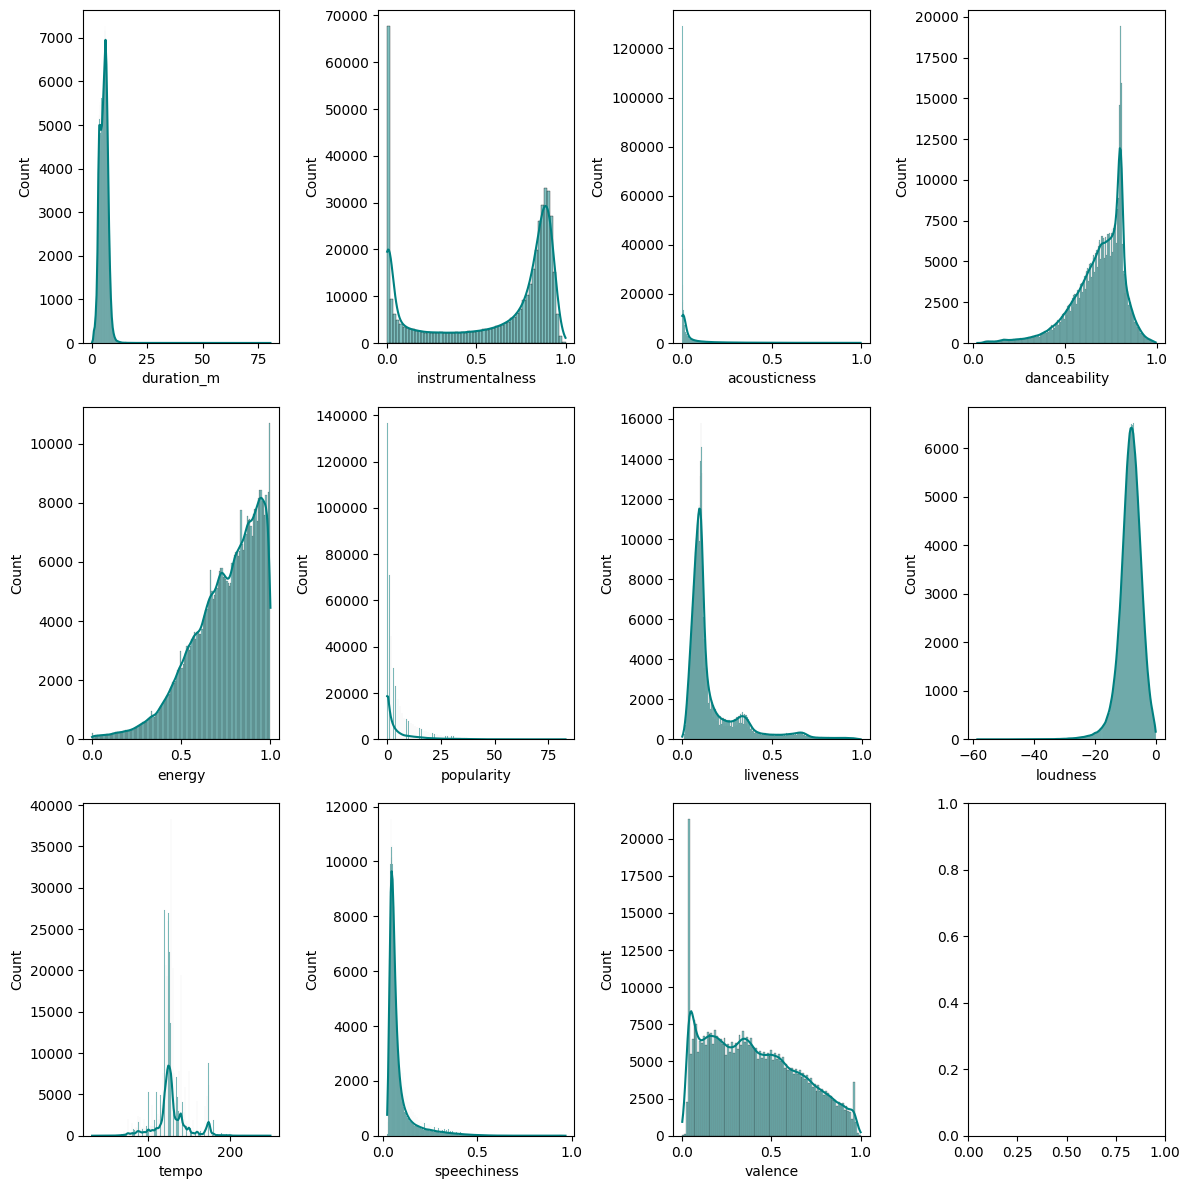

In [ ]:
# Set up the grid of subplots
f, axes = plt.subplots(3, 4, figsize=(12, 12))

# Plot using displot
sns.histplot(data["duration_m"], color="teal", ax=axes[0, 0], kde=True)
sns.histplot(data["instrumentalness"], color="teal", ax=axes[0, 1], kde=True)
sns.histplot(data["acousticness"], color="teal", ax=axes[0, 2], kde=True)
sns.histplot(data["danceability"], color="teal", ax=axes[0, 3], kde=True)
sns.histplot(data["energy"], color="teal", ax=axes[1, 0], kde=True)
sns.histplot(data["popularity"], color="teal", ax=axes[1, 1], kde=True)
sns.histplot(data["liveness"], color="teal", ax=axes[1, 2], kde=True)
sns.histplot(data["loudness"], color="teal", ax=axes[1, 3], kde=True)
sns.histplot(data["tempo"], color="teal", ax=axes[2, 0], kde=True)
sns.histplot(data["speechiness"], color="teal", ax=axes[2, 1], kde=True)
sns.histplot(data["valence"], color="teal", ax=axes[2, 2], kde=True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## 4. Handling categorical data

Handling of two categorical variables, "key" and "mode," through the application of one-hot encoding. One-hot encoding is a technique that transforms categorical variables into binary vectors, allowing our models to effectively incorporate these categorical attributes into the analysis.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451325 entries, 4 to 489522
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      451325 non-null  float64
 1   artist_name       451325 non-null  object 
 2   danceability      451325 non-null  float64
 3   duration_m        451325 non-null  float64
 4   energy            451325 non-null  float64
 5   explicit          451325 non-null  object 
 6   instrumentalness  451325 non-null  float64
 7   key               451325 non-null  int64  
 8   liveness          451325 non-null  float64
 9   loudness          451325 non-null  float64
 10  mode              451325 non-null  int64  
 11  month             451325 non-null  int64  
 12  popularity        451325 non-null  float64
 13  preview_url       451325 non-null  object 
 14  speechiness       451325 non-null  float64
 15  tempo             451325 non-null  int64  
 16  track_id          45

In [ ]:
data = pd.get_dummies(data, columns=['key', 'mode'], drop_first=True) # Creates binary (dummy) variables for each category within the "key" and "mode" columns.

In [ ]:
pd.set_option('display.max_columns', None) #To display all the columns
data.head()

,acousticness,artist_name,danceability,duration_m,energy,explicit,instrumentalness,liveness,loudness,month,popularity,preview_url,speechiness,tempo,track_id,valence,year,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1
4,0.00126,Headhunterz,0.355,2.943667,0.881,f,0.000002,0.0694,-3.962,7,26.0,https://p.scdn.co/mp3-preview/4229181352cb0c16...,0.1800,75,7o7Qx3kulN6A0uOaAPf5Vz,0.190,2022,0,0,0,0,0,0,0,0,1,0,0,1
5,0.18700,Headhunterz,0.552,3.902767,0.829,f,0.000054,0.2830,-4.988,9,51.0,https://p.scdn.co/mp3-preview/4d5c7620737fbd8e...,0.0845,150,0zolxiS5uiL5towOJrsJi4,0.367,2019,0,0,0,0,0,1,0,0,0,0,0,0
6,0.02730,Crossing Colors,0.839,5.818183,0.721,f,0.900000,0.0667,-7.721,7,9.0,https://p.scdn.co/mp3-preview/d8e54d5d229948b9...,0.0477,110,6AJ1Rk1khe1egig27nXImU,0.768,2018,0,0,0,0,0,0,0,0,1,0,0,0
7,0.01430,Brennan Heart,0.543,3.520000,0.827,f,0.000000,0.0842,-3.585,5,46.0,https://p.scdn.co/mp3-preview/a8e60e3bd2defda5...,0.0350,150,2KM4KCDbbfOvQ5cgWADd0Z,0.123,2021,1,0,0,0,0,0,0,0,0,0,0,0
8,0.01080,Brennan Heart,0.623,3.946667,0.832,f,0.000000,0.0487,-3.348,5,17.0,https://p.scdn.co/mp3-preview/758c6b9f2ff9b87b...,0.0566,150,7t2gGVF4Q7QnFM9dt9F0qE,0.439,2021,1,0,0,0,0,0,0,0,0,0,0,0


## 5. Feature selection



1. Correlation-based Feature Selection
2. Tree-Based Model





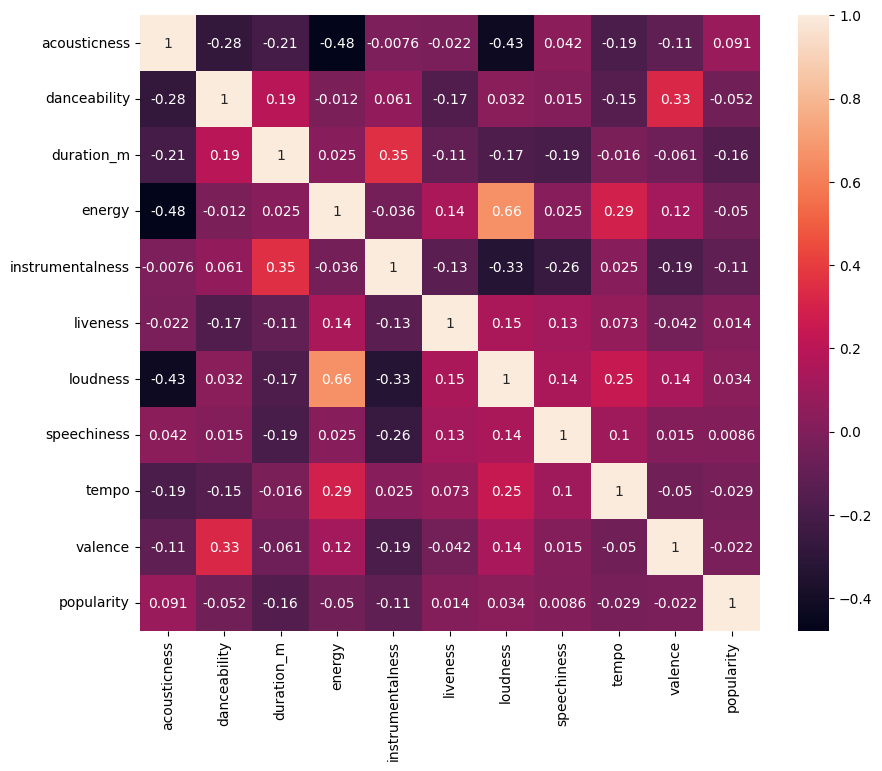

In [ ]:
# 1. CORRELATION-BASED FEATURE SELECTION

# Subset of features to include in the correlation matrix
selected_features = ["acousticness", "danceability", "duration_m", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence", "popularity"]

# Columns corresponding to the selected features
subset_data = data[selected_features]

# Correlation matrix for the selected features
correlation_matrix = subset_data.corr()

# size of the heatmap
plt.figure(figsize=(10, 8))  # Adjust the size

# Heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
import pandas as pd

# Calculate correlations with 'popularity' feature
popularity_correlations = subset_data.corr()['popularity']

# Remove the correlation of 'popularity' with itself (which will be 1)
popularity_correlations = popularity_correlations.drop('popularity')

# Create a DataFrame to store the results
correlation_df = pd.DataFrame({
    'Attributes': popularity_correlations.index,
    'Abs_Correlation': popularity_correlations.abs(),
})

# Add a 'Dependency' column based on the sign of the correlation
correlation_df['Dependency'] = correlation_df['Attributes'].apply(lambda feature: 'direct' if subset_data.corr()['popularity'][feature] > 0 else 'indirect')

# Sort the DataFrame in descending order of absolute correlation values
correlation_df = correlation_df.sort_values(by='Abs_Correlation', ascending=False)

# Reset the index to remove repetitiveness
correlation_df = correlation_df.reset_index(drop=True)

# Display the DataFrame
print(correlation_df)

         Attributes  Abs_Correlation Dependency
0        duration_m         0.160611   indirect
1  instrumentalness         0.112119   indirect
2      acousticness         0.091098     direct
3      danceability         0.051705   indirect
4            energy         0.049696   indirect
5          loudness         0.034210     direct
6             tempo         0.028890   indirect
7           valence         0.021522   indirect
8          liveness         0.013821     direct
9       speechiness         0.008591     direct


In this analysis, correlations between the 'popularity' feature, serving as the target variable, and all other features in the dataset are calculated. Key features that are most significantly influenced by the popularity of the data are identified through this process. By sorting these correlations in descending order, the features most positively or negatively associated with the popularity of the content are determined, providing valuable insights for the analysis.

Outcome:

Based on Correlation-based Feature Selection **instrumentalness**, **acousticness**, **danceability** and **energy** are the 4 most important features

**Tree-Based Model**:
2.1 Decision tree


In [ ]:

features = ["acousticness", "danceability", "duration_m", "energy", "instrumentalness", "key_1", "key_2", "key_3", "key_4", "key_5", "key_6", "key_7", "key_8", "key_9", "key_10", "key_11", "liveness",
            "mode_1", "speechiness", "loudness", "tempo", "valence"]

X = data[features] #data preparation
y = data['popularity'] #target variable

In [ ]:
# Import the Decision Tree Regressor from scikit-learn
from sklearn.tree import DecisionTreeRegressor
# Create a range of values for the maximum depth of the decision tree
max_depth_range = range(1, 15)
# Initialize an empty list to store Root Mean Squared Error (RMSE) scores
RMSE_scores = []

# Import the necessary libraries for cross-validation
from sklearn.model_selection import cross_val_score

# Perform cross-validation with different maximum depths
for depth in max_depth_range:
    treg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

#The code iterates through the range of maximum depths, creates a Decision Tree Regressor with each depth,
#performs cross-validation (5-fold cross-validation in this case), and calculates the RMSE for each depth.
#The resulting RMSE_scores list will contain the average RMSE for each maximum depth, which can be used to assess the model's performance at different tree depths.

(8.001283937406217, 6)

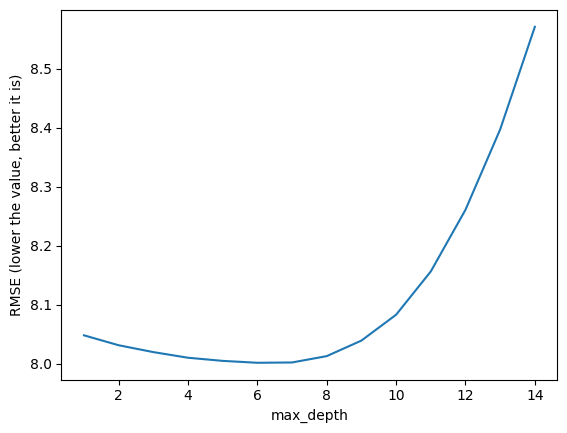

In [ ]:
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower the value, better it is)');
sorted(zip(RMSE_scores, max_depth_range))[0]

In [ ]:
treg = DecisionTreeRegressor(max_depth=7, random_state=1)
treg.fit(X, y)

DecisionTreeRegressor(max_depth=7, random_state=1)

In [ ]:
# Computing feature importances.
pd.DataFrame({'feature':features, 'importance':treg.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
2,duration_m,0.670545
4,instrumentalness,0.075604
20,tempo,0.065393
0,acousticness,0.046815
18,speechiness,0.041559
19,loudness,0.034042
1,danceability,0.028566
21,valence,0.023638
3,energy,0.009400
16,liveness,0.003374


**Tree-Based model**: 2.2 Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor #importing random forest regressor

In [ ]:
Rreg = RandomForestRegressor(n_estimators=150,
                              max_features=5,
                              oob_score=True,
                              random_state=1)

# Create a RandomForestRegressor model with specific hyperparameters:
# - n_estimators: The number of decision trees in the forest (set to 150).
# - max_features: The maximum number of features to consider for splitting a node (set to 5).
# - oob_score: Whether to use out-of-bag samples to estimate the R-squared score (set to True).
# - random_state: A seed for random number generation to ensure reproducibility (set to 1).

Rreg.fit(X, y) #fit the data to model

RandomForestRegressor(max_features=5, n_estimators=150, oob_score=True,
                      random_state=1)

In [ ]:
pd.DataFrame({'feature':features,
              'importance':Rreg.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
2,duration_m,0.123342
19,loudness,0.094830
0,acousticness,0.094370
4,instrumentalness,0.090344
18,speechiness,0.089663
21,valence,0.089404
1,danceability,0.088354
3,energy,0.087506
16,liveness,0.086930
20,tempo,0.067415


## 6. Important Visualizations

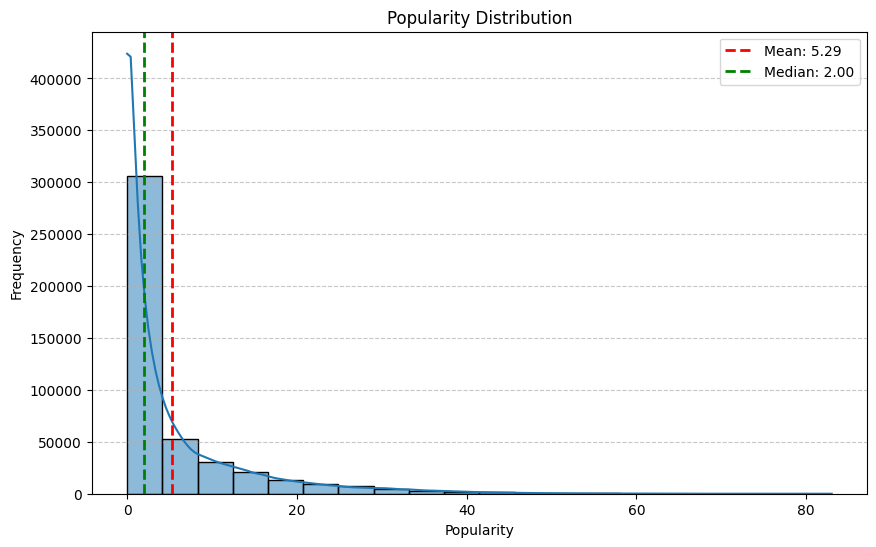

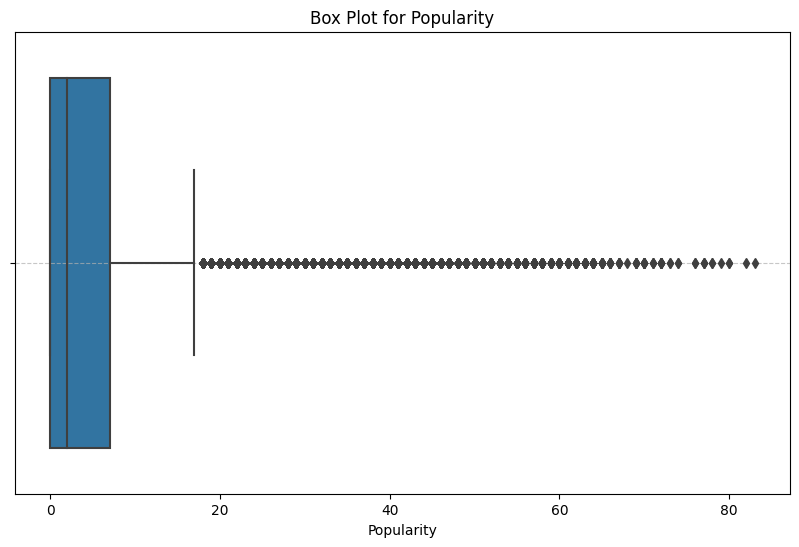

In [ ]:
# Visualize the distribution of 'popularity'
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], bins=20, kde=True)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Popularity Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add mean and median lines to the plot
mean_value = data['popularity'].mean()
median_value = data['popularity'].median()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

# Add a legend
plt.legend()

plt.show()

# Checking for outliers using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['popularity'])
plt.xlabel('Popularity')
plt.title('Box Plot for Popularity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='acousticness', ylabel='popularity'>

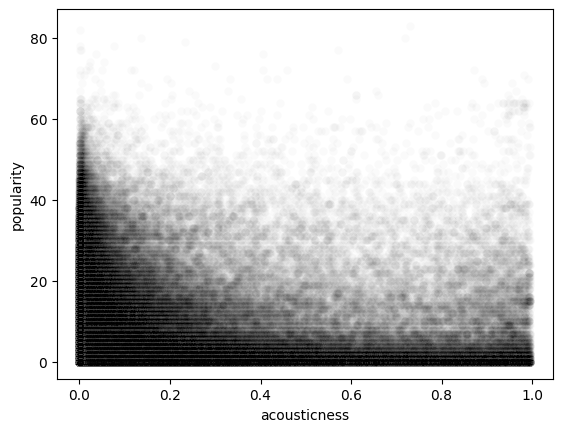

In [ ]:
sns.scatterplot(x = 'acousticness', y = 'popularity', data = data, alpha = 0.02, color = 'black')

<Axes: xlabel='instrumentalness', ylabel='popularity'>

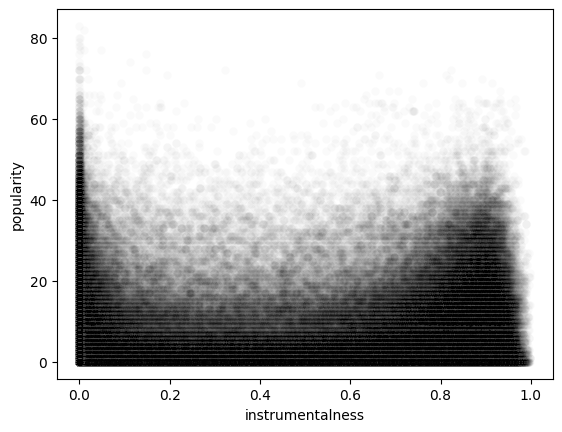

In [ ]:
sns.scatterplot(x = 'instrumentalness', y = 'popularity', data = data, alpha = 0.02, color = 'black')

<Axes: xlabel='energy', ylabel='popularity'>

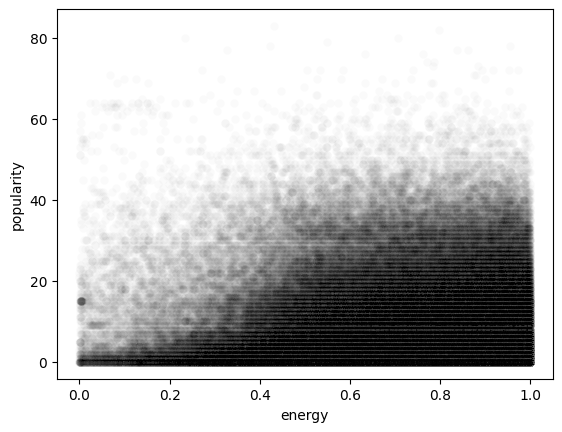

In [ ]:
sns.scatterplot(x = 'energy', y = 'popularity', data = data, alpha = 0.02, color = 'black')

<Axes: xlabel='danceability', ylabel='popularity'>

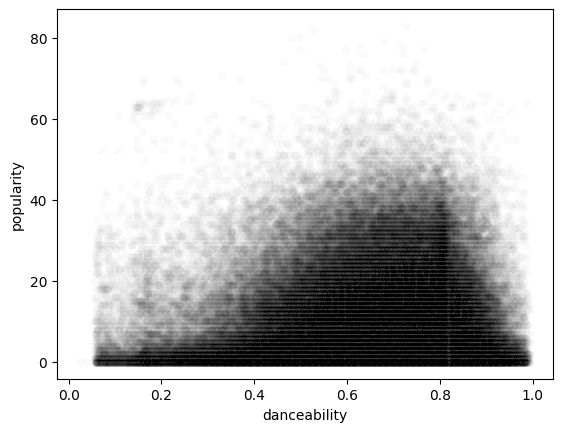

In [ ]:
sns.scatterplot(x = 'danceability', y = 'popularity', data = data, alpha = 0.02, color = 'black')

### Plotting the trend of mean popularity of year vs year

In [ ]:
# Find the minimum and maximum values in the 'year' column
min_year = data['year'].min()
max_year = data['year'].max()

print(f"Minimum year: {min_year}")
print(f"Maximum year: {max_year}")

Minimum year: 1908
Maximum year: 2023


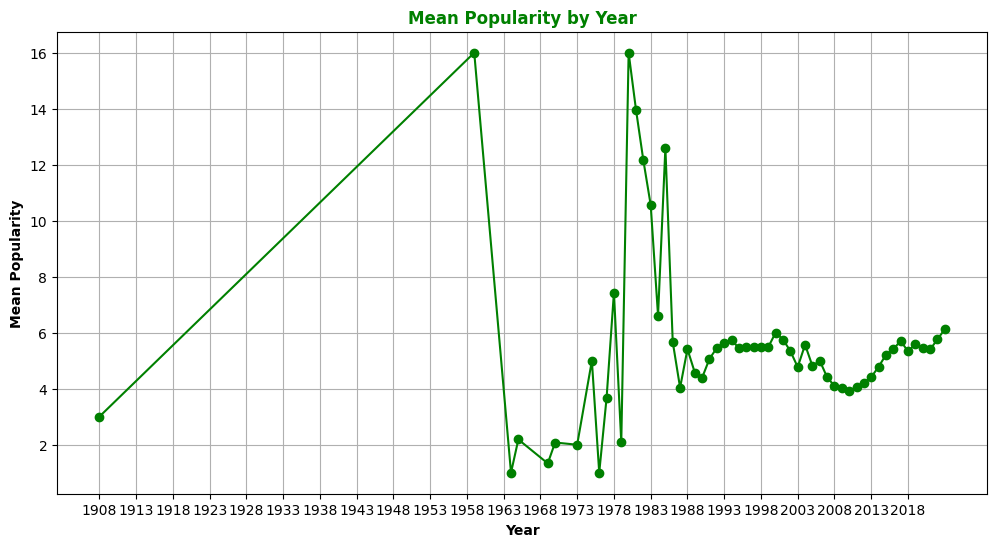

In [ ]:
# Group data by 'year' and calculate the mean popularity
mean_popularity_by_year = data.groupby('year')['popularity'].mean()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create a line plot for mean popularity of the year
ax.plot(mean_popularity_by_year.index, mean_popularity_by_year, color='green', marker='o', linestyle='-')

# Set the plot title
ax.set_title('Mean Popularity by Year', color='green', weight='bold')

# Set the y-axis label
ax.set_ylabel('Mean Popularity', weight='bold')

# Set the x-axis label
ax.set_xlabel('Year', weight='bold')

# Set x-axis tick positions at 5-year intervals from 1908 to 2023
ax.set_xticks(range(1908, 2023, 5))

# Display the plot
plt.grid(True)
plt.show()

The issue of fairness when calculating the mean popularity by year can be addressed by weighting the mean popularity based on the number of songs in each year. This approach ensures that years with fewer songs have less influence on the overall mean popularity. The calculation of the weighted mean popularity can be performed to achieve this goal.

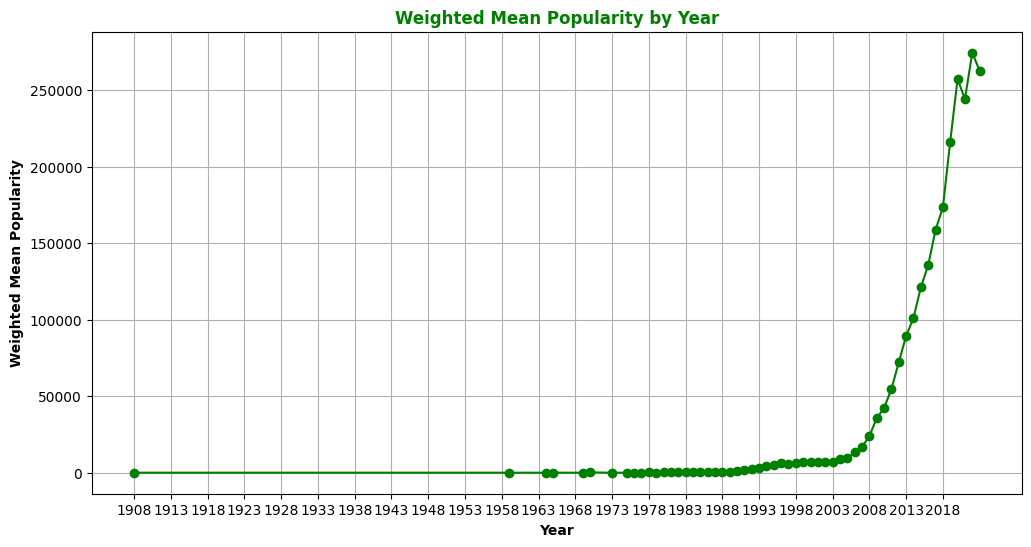

In [ ]:
# Group the data by year and calculate the weighted mean popularity
weighted_mean_popularity_by_year = data.groupby('year').apply(lambda x: (x['popularity'] * x['popularity'].count()).sum() / x['popularity'].count())

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Create a line plot for the weighted mean popularity by year
ax.plot(weighted_mean_popularity_by_year.index, weighted_mean_popularity_by_year, color='green', marker='o', linestyle='-')

# Set the plot title
ax.set_title('Weighted Mean Popularity by Year', color='green', weight='bold')

# Set the y-axis label
ax.set_ylabel('Weighted Mean Popularity', weight='bold')

# Set the x-axis label
ax.set_xlabel('Year', weight='bold')

# Set x-axis tick positions at 5-year intervals from 1908 to 2023
ax.set_xticks(range(1908, 2023, 5))

# Display the plot
plt.grid(True)
plt.show()

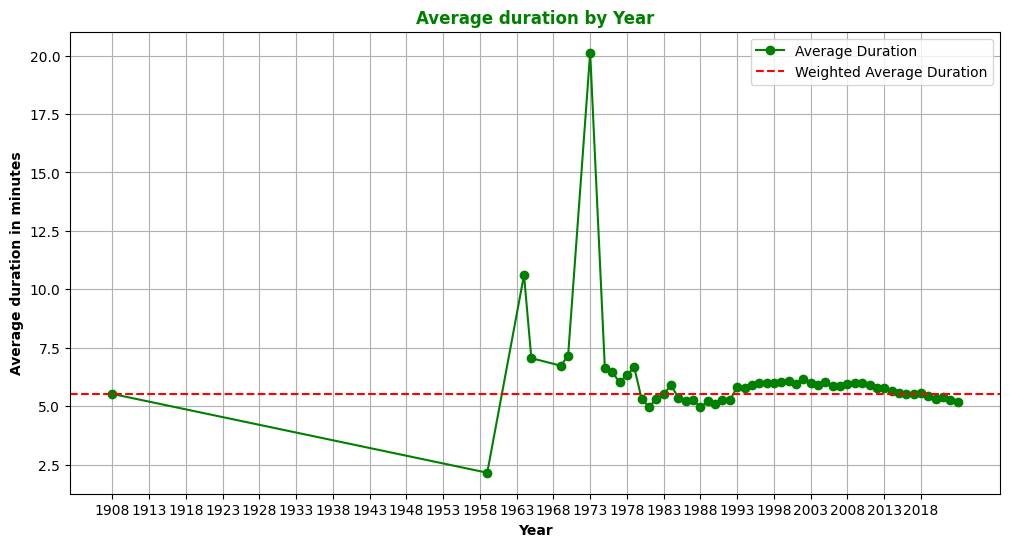

Weighted Average Duration: 5.51 minutes


In [ ]:
# Group data by 'year' and calculate the average song duration
average_duration_by_year = data.groupby('year')['duration_m'].mean()

# Group data by 'year' and calculate the number of songs in each year
song_counts_by_year = data['year'].value_counts().sort_index()

# Calculate the weighted average of song duration by year
weighted_average_duration = (average_duration_by_year * song_counts_by_year).sum() / song_counts_by_year.sum()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create a line plot for average song duration of the year
ax.plot(average_duration_by_year.index, average_duration_by_year, color='green', marker='o', linestyle='-', label='Average Duration')

# Add a horizontal line for the weighted average
ax.axhline(y=weighted_average_duration, color='red', linestyle='--', label='Weighted Average Duration')

# Set the plot title
ax.set_title('Average duration by Year', color='green', weight='bold')

# Set the y-axis label
ax.set_ylabel('Average duration in minutes', weight='bold')

# Set the x-axis label
ax.set_xlabel('Year', weight='bold')

# Set x-axis tick positions at 5-year intervals from 1908 to 2023
ax.set_xticks(range(1908, 2023, 5))

# Display the plot
plt.grid(True)
plt.legend()
plt.show()

# Print the weighted average duration
print(f'Weighted Average Duration: {weighted_average_duration:.2f} minutes')

Popularity with seasons:

The aim is to categorize months into seasons by creating a new 'season' column in the dataset. This categorization is achieved through the use of the "categorize_season" function, which assigns each month to a season based on specific month ranges. Once the 'season' column has been created, the mean popularity for each season is calculated by grouping the data according to seasons and computing the average popularity within each season. The resulting mean popularity values for the seasons are then visualized using a bar chart, with numerical values being displayed on the bars for clarity.

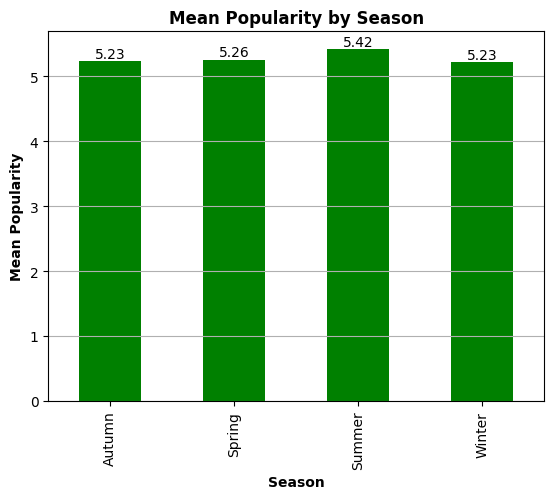

In [ ]:
# Function to categorize months into seasons
def categorize_season(row):
    month = row['month']
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Apply the function to create a new 'season' column
data['season'] = data.apply(categorize_season, axis=1)

# Group the data by seasons and calculate the mean popularity for each season
seasonal_popularity = data.groupby('season')['popularity'].mean()

# Plot the mean popularity of seasons
ax = seasonal_popularity.plot(kind='bar', color='green')
plt.title('Mean Popularity by Season', weight='bold')
plt.ylabel('Mean Popularity', weight='bold')
plt.xlabel('Season', weight='bold')
plt.grid(axis='y')

# Display the numerical values on the bar chart
for i, v in enumerate(seasonal_popularity):
    ax.text(i, v, f'{v:.2f}', color='black', ha='center', va='bottom')

plt.show()

# Drop the 'season' column from the data
data = data.drop('season', axis=1)

Artist:

The objective is to assess the popularity of music artists based on their historical performance. To achieve this, the dataset is grouped by artist names, and the mean popularity of each artist is calculated. Subsequently, the artists are sorted in descending order based on their mean popularity scores, enabling the identification of the top 20 most popular artists.

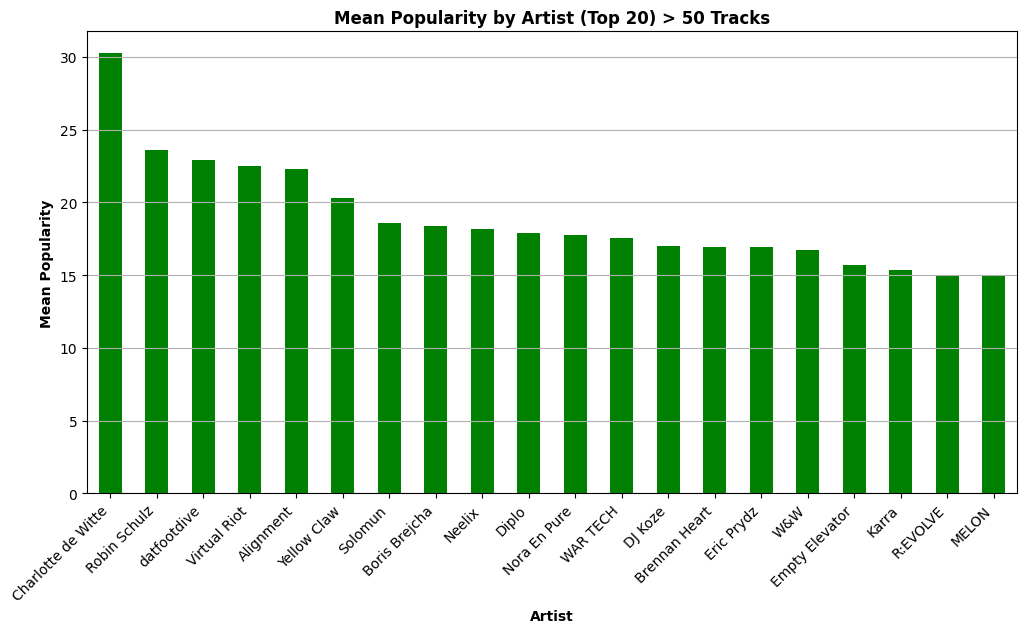

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by artist name and calculate the mean popularity
artist_popularity = data.groupby('artist_name')['popularity'].mean()

# Count the number of tracks for each artist
artist_track_count = data['artist_name'].value_counts()

# Filter the artists with more than 50 tracks
top_artists = artist_track_count[artist_track_count > 50].index

# Filter the mean popularity for the selected artists
filtered_artist_popularity = artist_popularity[top_artists]

# Sort the artists by mean popularity in descending order
filtered_artist_popularity = filtered_artist_popularity.sort_values(ascending=False)

# Select the top 20 artists
top_20_artists = filtered_artist_popularity.head(20)

# Plot the mean popularity for the top 20 artists
fig, ax = plt.subplots(figsize=(12, 6))
top_20_artists.plot(kind='bar', color='green', ax=ax)
plt.title('Mean Popularity by Artist (Top 20) > 50 Tracks', weight='bold')
plt.ylabel('Mean Popularity', weight='bold')
plt.xlabel('Artist', weight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451325 entries, 4 to 489522
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      451325 non-null  float64
 1   artist_name       451325 non-null  object 
 2   danceability      451325 non-null  float64
 3   duration_m        451325 non-null  float64
 4   energy            451325 non-null  float64
 5   explicit          451325 non-null  object 
 6   instrumentalness  451325 non-null  float64
 7   liveness          451325 non-null  float64
 8   loudness          451325 non-null  float64
 9   month             451325 non-null  int64  
 10  popularity        451325 non-null  float64
 11  preview_url       451325 non-null  object 
 12  speechiness       451325 non-null  float64
 13  tempo             451325 non-null  int64  
 14  track_id          451325 non-null  object 
 15  valence           451325 non-null  float64
 16  year              45

## 7. Categorisation

Making categories for popularity (target variable)

In [ ]:
pd.cut(data['popularity'], bins=3) #Making 3 equal bins

4         (-0.083, 27.667]
5         (27.667, 55.333]
6         (-0.083, 27.667]
7         (27.667, 55.333]
8         (-0.083, 27.667]
                ...       
489518    (-0.083, 27.667]
489519    (-0.083, 27.667]
489520    (-0.083, 27.667]
489521    (-0.083, 27.667]
489522    (-0.083, 27.667]
Name: popularity, Length: 451325, dtype: category
Categories (3, interval[float64, right]): [(-0.083, 27.667] < (27.667, 55.333] < (55.333, 83.0]]

In [ ]:
pd.cut(data['popularity'], bins=3, labels = ["low", "medium", "high"]).value_counts() #value count of the bins

low       436277
medium     14652
high         396
Name: popularity, dtype: int64

In [ ]:
data['label'] = pd.cut(data.popularity, bins=3, labels=["low", "medium", "high"], right=True) #New label for popularity

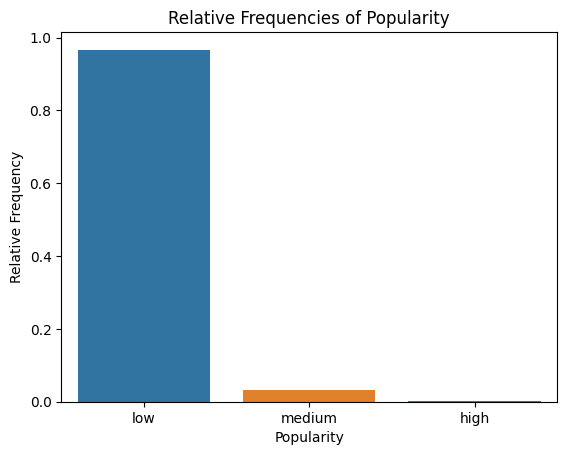


low       0.966658
medium    0.032464
high      0.000877
Name: label, dtype: float64


In [ ]:
# Calculate the relative frequencies
y = data.label
relative_frequencies = y.value_counts() / y.count()

# Create a bar plot
sns.barplot(x=relative_frequencies.index, y=relative_frequencies.values)

# labels and a title
plt.xlabel("Popularity")
plt.ylabel("Relative Frequency")
plt.title("Relative Frequencies of Popularity")

# The plot
plt.show()
print("") #For a space
print(relative_frequencies)

Outcomes: The provided distribution of labeled data indicates that the "low" label is characterized by a significantly higher proportion in comparison to the "high" and "medium" labels. In this dataset, the "low" label represents the majority class, accounting for approximately 97% of the data, while the "high" and "medium" labels correspond to the minority classes, comprising roughly 3% and 0.09%, respectively.

Given that the "low" class constitutes the majority class and the "high" and "medium" classes are identified as minority classes, therefore to maintain the uniformity of the data oversampling of the minority classes, namely "high" and "medium" is done in the following cell.

### Oversampling:

1.   Random Over sampler
2.   SMOTE

**Random Over Sampler:**

Random oversampler method involves randomly duplicating or generating new samples from the minority class to balance the class distribution.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# For a reminder what the X and y holds
"""
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key_1", "key_2", "key_3", "key_4", "key_5", "key_6", "key_7", "key_8", "key_9", "key_10", "key_11", "liveness",
            "mode_1", "speechiness", "loudness", "tempo", "valence"]

X = data[features] #data preparation
y = data['popularity'] #target variable
"""
# Create an instance of the Random over sampler
ROS = RandomOverSampler()

# Apply ROS to the feature matrix and target variable
X_ROS, y_ROS = ROS.fit_resample(X, y)

print('Removed indexes:')

print(X_ROS.shape, y_ROS.shape)
print("-----------------")
print(y_ROS.value_counts())
print("-----------------")
print(X_ROS.value_counts())

Removed indexes:
(1308831, 22) (1308831,)
-----------------
low       436277
medium    436277
high      436277
Name: label, dtype: int64
-----------------
acousticness  danceability  duration_m  energy  instrumentalness  key_1  key_2  key_3  key_4  key_5  key_6  key_7  key_8  key_9  key_10  key_11  liveness  mode_1  speechiness  loudness  tempo  valence
0.86500       0.148         2.016667    0.0804  0.730000          0      0      0      0      0      0      0      0      0      1       0       0.0896    1       0.0384       -27.717   71     0.0354     1230
0.00431       0.743         4.500000    0.9620  0.645000          0      0      0      0      0      0      0      0      0      0       1       0.3510    0       0.0628       -3.205    128    0.6460     1179
0.36200       0.633         3.562667    0.5240  0.000146          1      0      0      0      0      0      0      0      0      0       0       0.1080    0       0.1340       -10.111   85     0.3750     1179
0.03570       0.6

**SMOTE**

Synthetic Minority Over-sampling Technique (SMOTE), generate synthetic samples rather than duplicating existing ones. SMOTE can be used in conjunction with normalization to improve the balance and scale the data effectively.

In [ ]:
from imblearn.over_sampling import SMOTE

# Create an instance of the SMOTE resampler
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the feature matrix and target variable
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after SMOTE
print(y_resampled.value_counts())
print("-----------------")
print(X_resampled.value_counts())

low       436277
medium    436277
high      436277
Name: label, dtype: int64
-----------------
acousticness  danceability  duration_m  energy  instrumentalness  key_1  key_2  key_3  key_4  key_5  key_6  key_7  key_8  key_9  key_10  key_11  liveness  mode_1  speechiness  loudness  tempo  valence
0.00443       0.806         8.147733    0.4690  0.922000          1      0      0      0      0      0      0      0      0      0       0       0.0960    1       0.0521       -12.103   121    0.407      17
0.00306       0.641         3.197750    0.8750  0.000082          0      0      0      0      0      0      0      0      0      0       1       0.3700    0       0.3380       -5.842    140    0.527      13
0.05770       0.458         5.776667    0.8600  0.684000          0      0      0      0      0      0      0      1      0      0       0       0.0767    1       0.0685       -10.134   145    0.217      12
0.12600       0.827         6.474667    0.7680  0.225000          0      0      0  

In [ ]:
# Check the class distribution after SMOTE
y_resampled.value_counts()

low       436277
medium    436277
high      436277
Name: label, dtype: int64

## 8. Normalization

 It's a good practice to normalize (or scale) the features that have different scales or ranges to ensure that they contribute equally to the modeling process. Normalization can improve the performance and convergence of many machine learning algorithms.

 Variables Consider for normalization:



1. duration_ms: It's expect that the length of a song can influence its popularity, thus it is considered for normalization.

2. loudness: It's on a different scale compared to the other features.

3. tempo: Tempo can have a wide range of values, since it's significantly different from the range [0, 1] therefore normalized it.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the selected columns
X_resampled[['duration_m', 'loudness', 'tempo']] = scaler.fit_transform(X_resampled[['duration_m', 'loudness', 'tempo']])

# The rest of the features remain unchanged

In [ ]:
X_resampled.head()

,acousticness,danceability,duration_m,energy,instrumentalness,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,liveness,mode_1,speechiness,loudness,tempo,valence
0,0.00126,0.355,-0.838201,0.881,0.000002,0,0,0,0,0,0,0,0,1,0,0,0.0694,1,0.1800,0.884494,-2.220444,0.190
1,0.18700,0.552,-0.312968,0.829,0.000054,0,0,0,0,0,1,0,0,0,0,0,0.2830,0,0.0845,0.693599,1.063408,0.367
2,0.02730,0.839,0.735975,0.721,0.900000,0,0,0,0,0,0,0,0,1,0,0,0.0667,0,0.0477,0.185104,-0.687980,0.768
3,0.01430,0.543,-0.522583,0.827,0.000000,1,0,0,0,0,0,0,0,0,0,0,0.0842,0,0.0350,0.954638,1.063408,0.123
4,0.01080,0.623,-0.288927,0.832,0.000000,1,0,0,0,0,0,0,0,0,0,0,0.0487,0,0.0566,0.998733,1.063408,0.439
